In [159]:
%matplotlib notebook

import numpy as np
import rasterio as rio
from rasterio import plot 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from rasterio.plot import show

In [154]:
b4_20= rio.open("D://RS_Ulster//722egm//gitRepository//Week5//datafiles_ass//2020//2020_b4.TIF")
b5_20= rio.open("D://RS_Ulster//722egm//gitRepository//Week5//datafiles_ass//2020//2020_b5.TIF")
b4_13 = rio.open("D://RS_Ulster//722egm//gitRepository//Week5//datafiles_ass//2013//2013_b4.TIF")
b5_13 = rio.open("D://RS_Ulster//722egm//gitRepository//Week5//datafiles_ass//2013//2013_b5.TIF")


imgb5_20 = b5_20.read(1) #it creates an issue if one only has read(), i do not know why
imgb5_13 = b5_13.read(1)

imgb4_20 = b4_20.read(1) #it creates an issue if one only has read(), i do not know why


print(b5_20.shape, b5_20.crs, b5_20.indexes)
print(b5_13.shape, b5_13.crs, b5_13.indexes)

print(imgb5_13.shape)
print(imgb5_20.shape)

print(b5_20.bounds) 
print(b5_13.bounds) #which is surprising bc they are not the same

imgb5_20.shape == b5_20.shape
print(imgb5_20.shape) 
print(b5_20.shape)

#print(imgb5_20.meta) #AttributeError: 'numpy.ndarray' object has no attribute 'meta'
print(b5_20.meta)
           

(7741, 7591) EPSG:32635 (1,)
(7301, 7501) EPSG:32635 (1,)
(7301, 7501)
(7741, 7591)
BoundingBox(left=475785.0, bottom=-276315.0, right=703515.0, top=-44085.0)
BoundingBox(left=476085.0, bottom=-269715.0, right=701115.0, top=-50685.0)
(7741, 7591)
(7741, 7591)
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7591, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32635), 'transform': Affine(30.0, 0.0, 475785.0,
       0.0, -30.0, -44085.0)}


In [69]:
imgb5_20[3870, 3795] #IndexError: index 4000 is out of bounds for axis 0 with size 1, i can only index this if i have read(1), not with read()
#b5_20.index(3870, 3795) #what does that return?? why two numbers and not a cross? 




17690

In [66]:
my_bands = [imgb5_20, imgb5_13]
my_bands[0]
print(imgb5_20.max())
print(imgb5_13.max())
#for i in my_bands:
    #maxvals = my_bands[i].max()
   # print(maxvals) doesnt work for some reasons bc says in
#TypeError: only integer scalar arrays can be converted to a scalar index

51456
56029


In [83]:
b5_20.transform * (0,0)

(475785.0, -44085.0)

In [96]:
centeri, centerj = b5_20.height // 2, b5_20.width // 2 # note that centeri corresponds to the row, and centerj the column
centerx, centery = b5_20.transform * (centerj, centeri) # note the reversal here, from i,j to j,i, this returns coordinates? 
print(b5_20.index(centerx, centery)) #are these pixel numbers? 
print((centeri, centerj) == b5_20.index(centerx, centery)) # check that these are the same
 
#question: if I index the b5_20: do I get the column, row number? 
#and if I index the imgb5_20, I get the pixel value?

print(imgb5_20[3870, 3795])
b5_20.index(3870, 3795) #what is indexed here exactly? do the two numbers refer to the pixel values at column, row?



(3870, 3795)
True
17690


(-1596, -15731)

In [90]:
#top,lft = b5_20.transform * (0, 0)
#bot,rgt = b5_20.transform * (3870, 3795)
#subset = b5_20.read(window=((top, bot), (lft, rgt))) # format is (top, bottom), (left, right)

#print(subset) #subset is an empty list for some reason
#plot.show(subset) #shows empty figure

In [122]:
centeri, centerj = b5_20.height // 2, b5_20.width // 2 # note that centeri corresponds to the row, and centerj the column
centerx, centery = b5_20.transform * (centerj, centeri) # note the reversal here, from i,j to j,i

top, lft = b5_20.index(centerx-10000, centery+10000)
bot, rgt = b5_20.index(centerx+10000, centery-10000)

subset = b5_20.read(window=((top, bot), (lft, rgt))) # format is (top, bottom), (left, right)


        

<IPython.core.display.Javascript object>


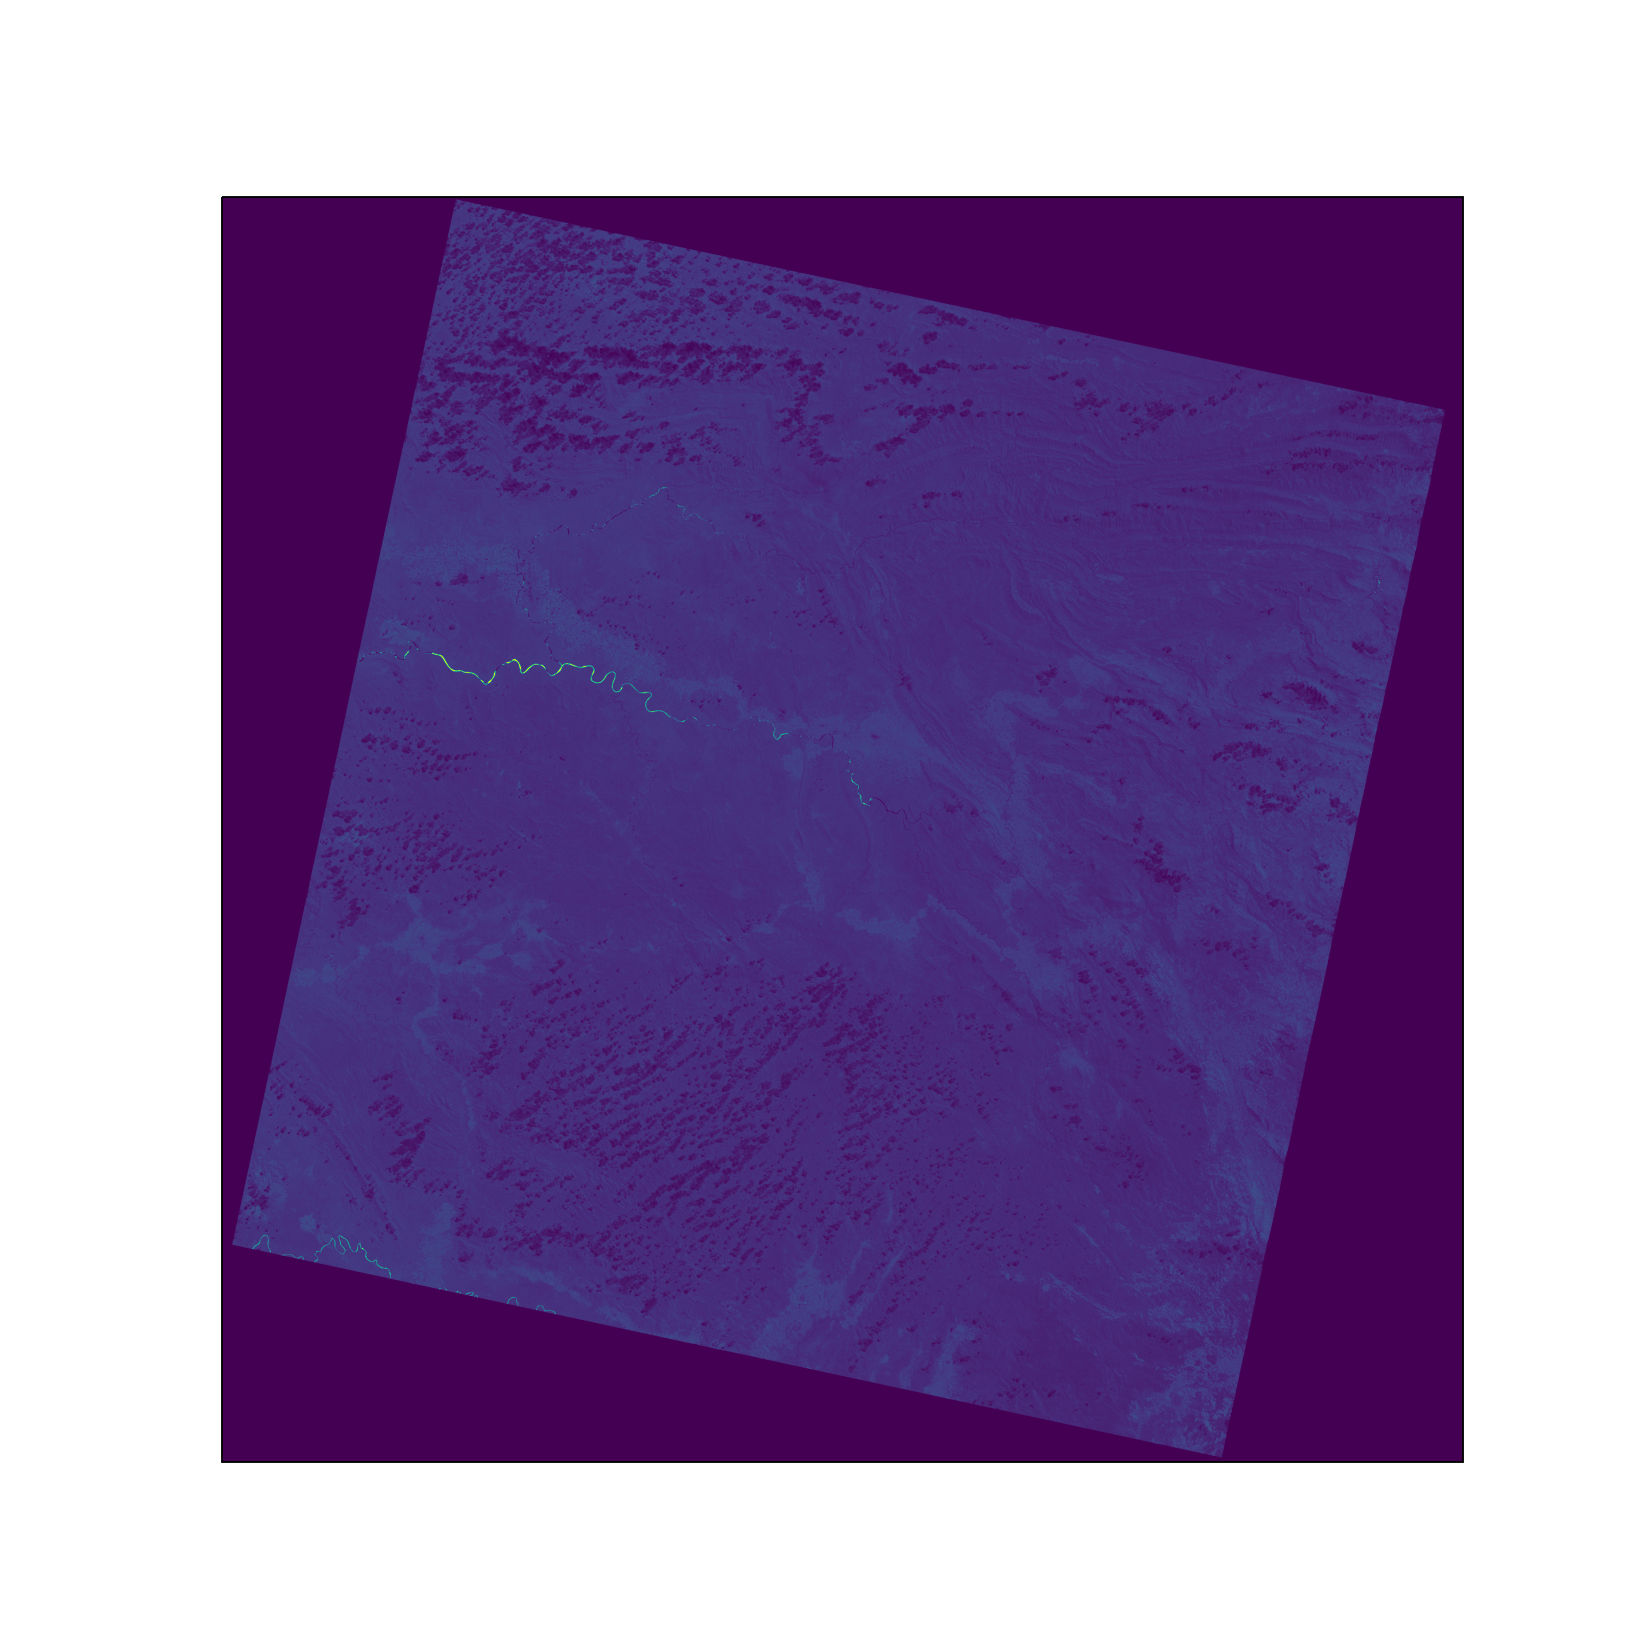

In [124]:
plot.show(subset)
fig



In [156]:
diff = imgb5_20 - imgb5_13
print(diff)

plot.show(diff)

ValueError: operands could not be broadcast together with shapes (7741,7591) (7301,7501) 

In [134]:
#generate nir and red objects as arrays in float64 format
red = imgb4_20.astype(np.float32)
nir = imgb5_20.astype(np.float32)

red.dtype

dtype('float32')

In [152]:
#ndvi calculation, empty cells or nodata cells are reported as 0

def ndvi(b1,b2):
        z=  (nir - red)
        n= (nir+ red)
        if z == 0:
            continue
            if n == 0:
                continue
            ndvi = z/n
            return ndvi
        
     


SyntaxError: 'continue' not properly in loop (2824007223.py, line 7)

In [111]:
with rio.open("D://RS_Ulster//722egm//gitRepository//Week5//datafiles_ass//2020//2020_b5.TIF") as datasetb5_20:
    imgb5_20 = datasetb5_20.read(1)
    xmin, ymin, xmax, ymax = datasetb5_20.bounds    

<IPython.core.display.Javascript object>


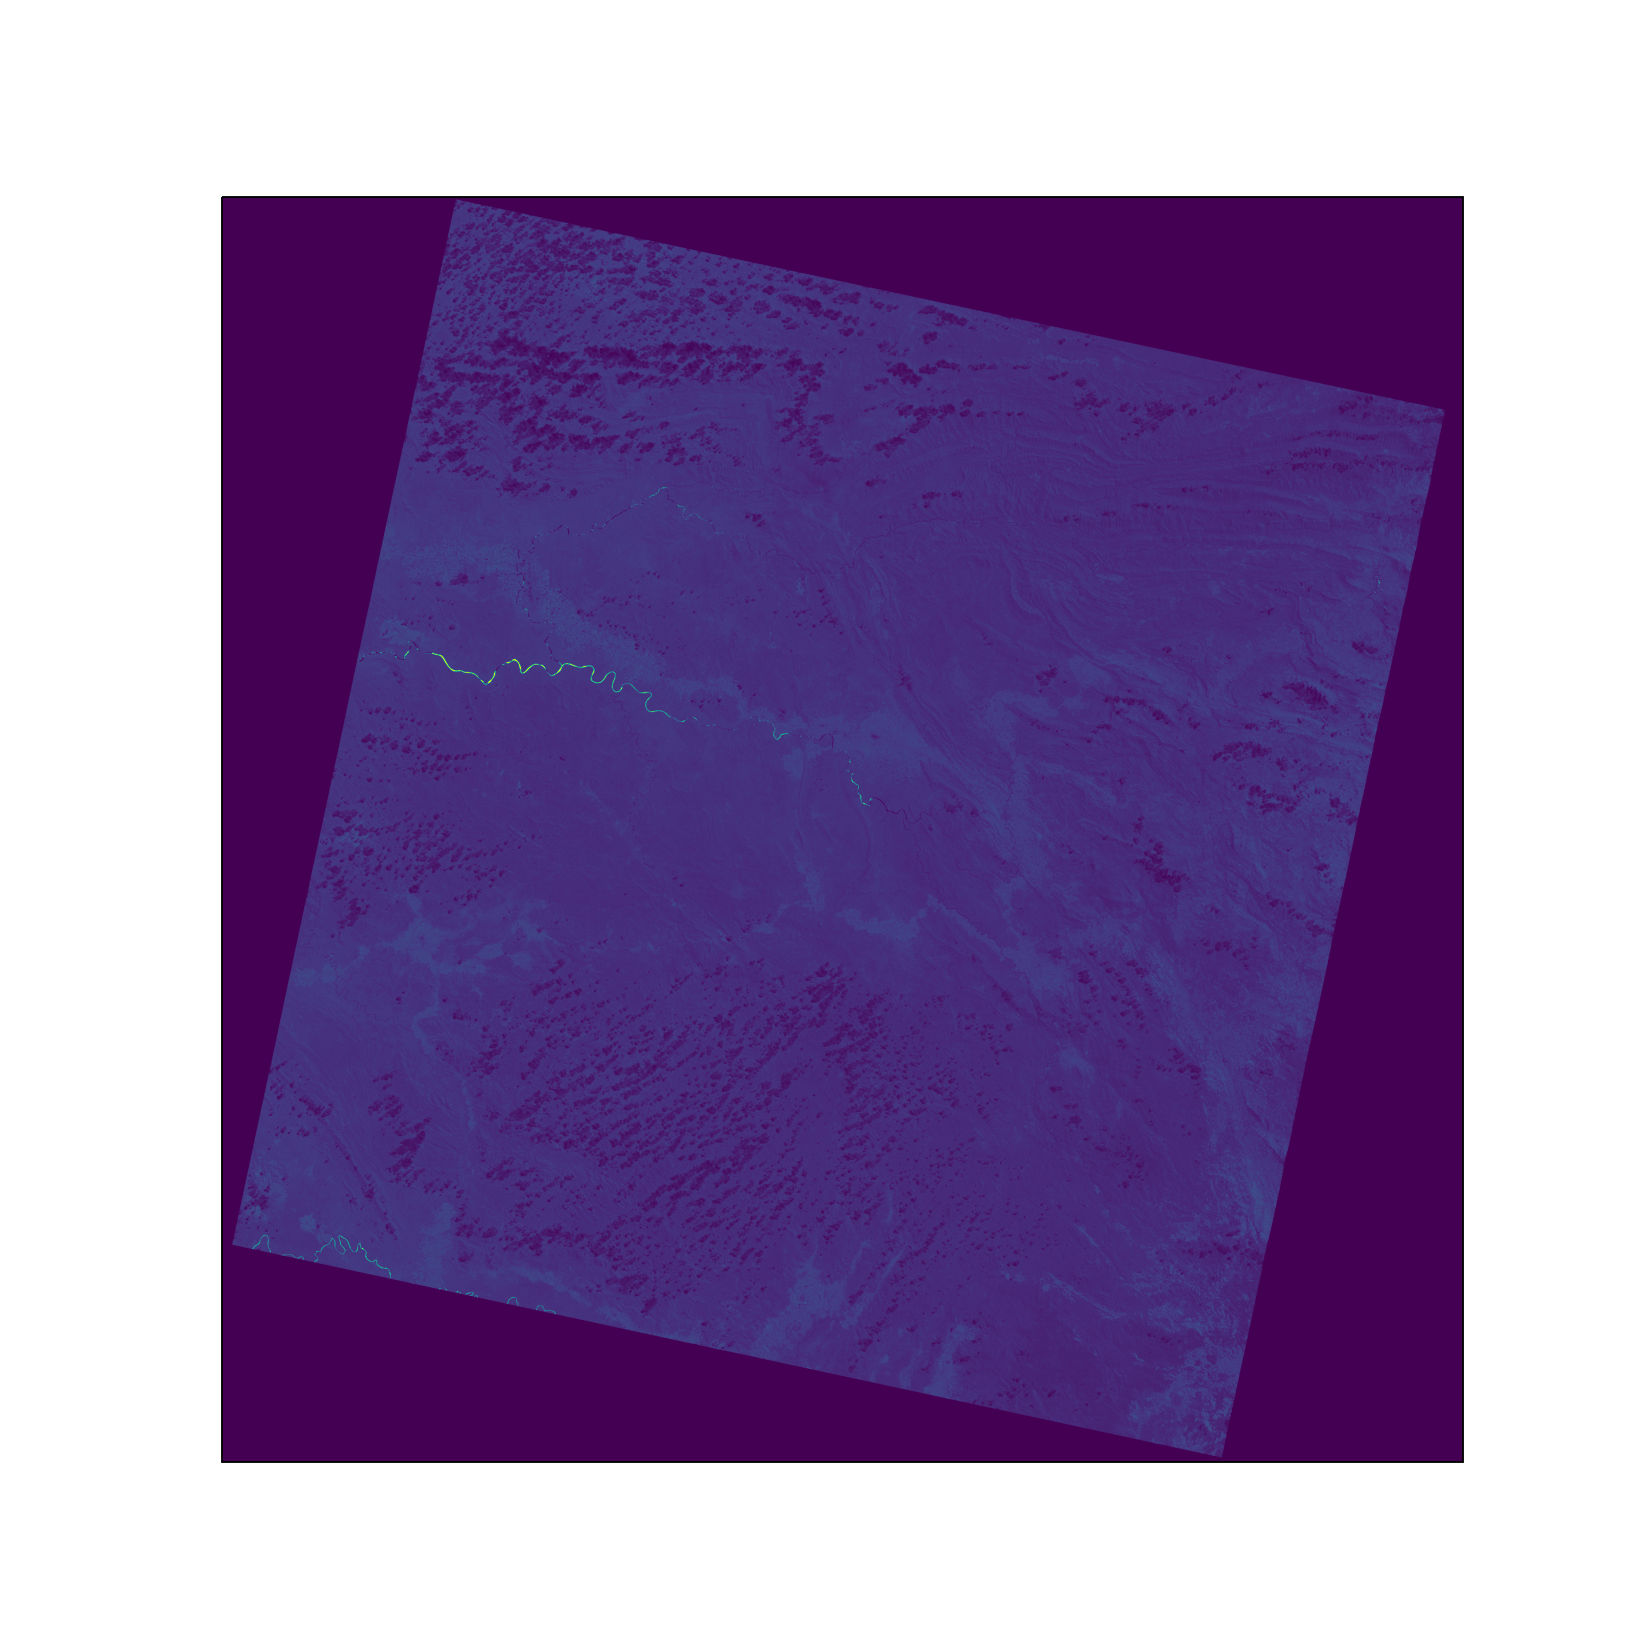

In [106]:
myCRS = ccrs.UTM(35) # note that this matches with the CRS of our image
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=myCRS))

<IPython.core.display.Javascript object>


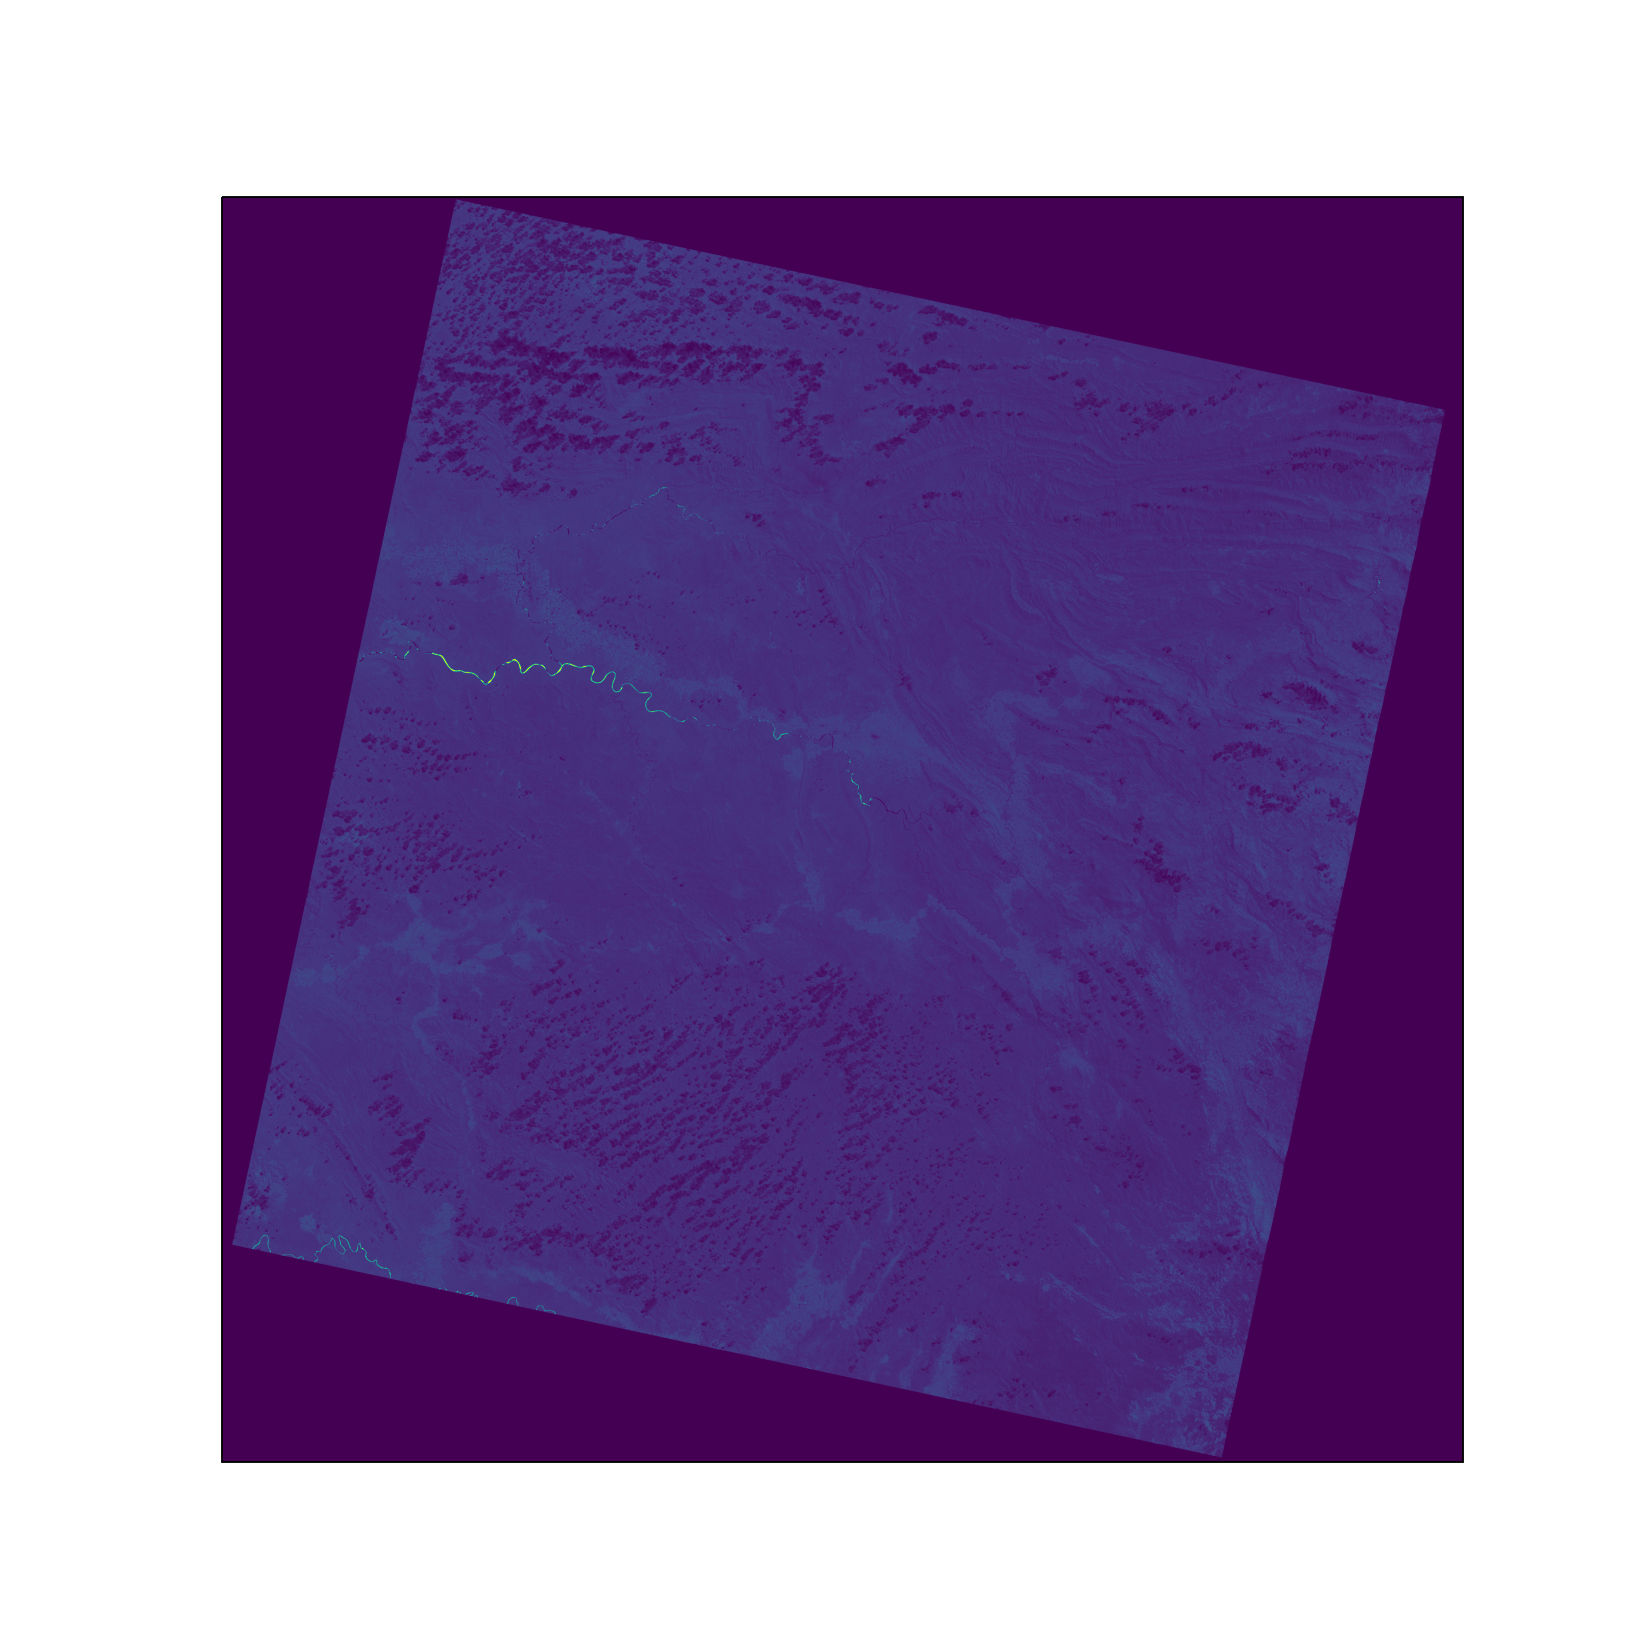

In [112]:
ax.imshow(imgb5_20,  vmin=200, vmax=40000,transform=myCRS, extent=[xmin, xmax, ymin, ymax]) 
fig

In [113]:
def percentile_stretch(image, pmin=0., pmax=100.):
    '''
    This is where you should write a docstring.
    '''
    # here, we make sure that pmin < pmax, and that they are between 0, 100
    if not 0 <= pmin < pmax <= 100:
        raise ValueError('0 <= pmin < pmax <= 100')
    # here, we make sure that the image is only 2-dimensional
    if not image.ndim == 2:
        raise ValueError('Image can only have two dimensions (row, column)')
    
    minval = np.percentile(image, pmin)
    maxval = np.percentile(image, pmax)
    
    stretched = (image - minval) / (maxval - minval) # stretch the image to 0, 1
    stretched[image < minval] = 0 # set anything less than minval to the new minimum, 0.
    stretched[image > maxval] = 1 # set anything greater than maxval to the new maximum, 1.
    
    return stretched

In [119]:
def img_display(image, ax,transform, extent, pmin=0, pmax=100):
    '''
    This is where you should write a docstring.
    '''
    dispimg = image.copy().astype(np.float32) # make a copy of the original image,
    # but be sure to cast it as a floating-point image, rather than an integer

    for b in range(image.shape[0]): # loop over each band, stretching using percentile_stretch()
        dispimg[b] = percentile_stretch(image[b], pmin=pmin, pmax=pmax)

    # next, we transpose the image to re-order the indices
    dispimg = dispimg.transpose([1, 2, 0])
    
    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)
    
    return handle, ax

In [120]:
h, ax = img_display(imgb5_20, ax,  myCRS, [xmin, xmax, ymin, ymax], pmin=0.1, pmax=99.9)
fig # just to save you from scrolling back up to see

ValueError: Image can only have two dimensions (row, column)

In [ ]:
myCRS = ccrs.UTM(35) 

def percentile_stretch(image, pmin=0., pmax=100.):
    '''
    This is where you should write a docstring.
    '''
    # here, we make sure that pmin < pmax, and that they are between 0, 100
    if not 0 <= pmin < pmax <= 100:
        raise ValueError('0 <= pmin < pmax <= 100')
    # here, we make sure that the image is only 2-dimensional
    if not image.ndim == 2:
        raise ValueError('Image can only have two dimensions (row, column)')
    
    minval = np.percentile(image, pmin)
    maxval = np.percentile(image, pmax)
    
    stretched = (image - minval) / (maxval - minval) # stretch the image to 0, 1
    stretched[image < minval] = 0 # set anything less than minval to the new minimum, 0.
    stretched[image > maxval] = 1 # set anything greater than maxval to the new maximum, 1.
    
    return stretched

In [ ]:
b3.transform


In [ ]:
centeri, centerj = b3.height // 2, b3.width // 2 # note that centeri corresponds to the row, and centerj the column
centerx, centery = b3.transform * (centerj, centeri) # note the reversal here, from i,j to j,i
print(centerx, centery)


In [ ]:
b3.transform * (0, 0)


In [ ]:
b3.transform * (b3.width, b3.height)



In [ ]:
b3.crs



In [ ]:
plot.show(b3)

In [ ]:
def img_display(image, ax, bands, transform, extent):
    '''
    This is where you should write a docstring.
    '''
    # first, we transpose the image to re-order the indices
    dispimg = image.transpose([1, 2, 0])
    
    # next, we have to scale the image.
    dispimg = dispimg / dispimg.max()
    
    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)
    
    return handle, ax

In [ ]:
h, ax = img_display(img, ax, [0], myCRS, [xmin, xmax, ymin, ymax])
fig # just to save you from scrolling back up to see

In [ ]:
maxvals = [img[i].min() for i in range(dataset.count)]
print(maxvals)

In [ ]:
def percentile_stretch(image, pmin=0., pmax=100.):
    '''
    This is where you should write a docstring.
    '''
    # here, we make sure that pmin < pmax, and that they are between 0, 100
    if not 0 <= pmin < pmax <= 100:
        raise ValueError('0 <= pmin < pmax <= 100')
    # here, we make sure that the image is only 2-dimensional
    if not image.ndim == 2:
        raise ValueError('Image can only have two dimensions (row, column)')
    
    minval = np.percentile(image, pmin)
    maxval = np.percentile(image, pmax)
    
    stretched = (image - minval) / (maxval - minval) # stretch the image to 0, 1
    stretched[image < minval] = 0 # set anything less than minval to the new minimum, 0.
    stretched[image > maxval] = 1 # set anything greater than maxval to the new maximum, 1.
    
    return stretched

In [ ]:
def img_display(image, ax, bands, transform, extent, pmin=0, pmax=100):
    '''
    This is where you should write a docstring.
    '''
    dispimg = image.copy().astype(np.float32) # make a copy of the original image,
    # but be sure to cast it as a floating-point image, rather than an integer

    for b in range(image.shape[0]): # loop over each band, stretching using percentile_stretch()
        dispimg[b] = percentile_stretch(image[b], pmin=pmin, pmax=pmax)

    # next, we transpose the image to re-order the indices
    dispimg = dispimg.transpose([1, 2, 0])
    
    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)
    
    return handle, ax

In [ ]:
h, ax = img_display(img, ax, [0], myCRS, [xmin, xmax, ymin, ymax], pmin=0.1, pmax=99.9)
fig # just to save you from scrolling back up to see